In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
env_data = pd.read_excel("RainbowTrout_Growth_Data.xlsx", sheet_name = "Covariate_Data")

fish_data = pd.read_excel("RainbowTrout_Growth_Data.xlsx", sheet_name = "Growth_Data")

### Dictionary
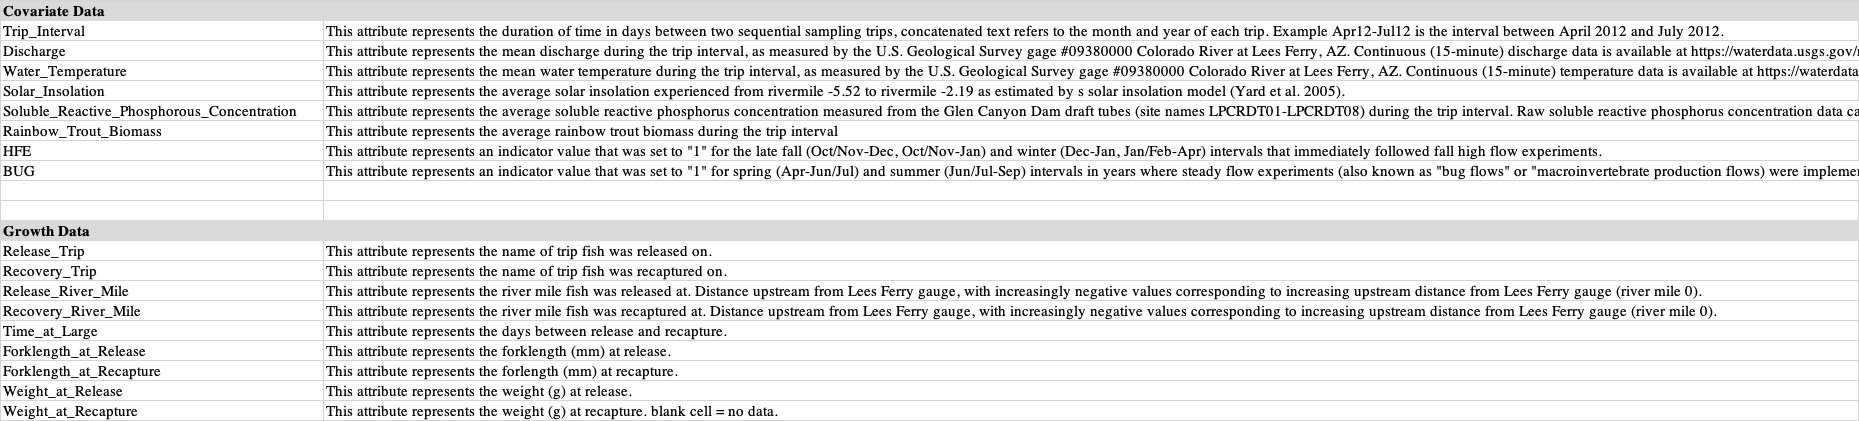

### Background Info
- **Freshwater rainbow trout** \
  Typically grow to 30–50 centimeters long and weigh 0.45 – 1.8 kilograms. They live their entire lives in freshwater or sometimes brackish water 
- **Ocean rainbow trout (steelhead)**\
  Typically grow to 50–75 centimeters long and weigh 4 kilograms. They spend two to three years in freshwater, then two to three years in the ocean

### Aditional Info
- Trout Lifecycle  - https://www.wildtrout.org/content/trout-lifecycle
- BUG Flow Experienment - https://www.wapa.gov/bug-flow-experiment-supports-the-colorado/
- Colorado River High Flow Experiement (HFE) - https://www.grandcanyontrust.org/blog/how-grand-canyon-high-flow-experiments-work 
- Effects of Solutable in phosphorus on fish - https://bcn.boulder.co.us/basin/data/NEW/info/TP.html#:~:text=In%20freshwater%20lakes%20and%20rivers,breathe%2C%20leading%20to%20fish%20kills.

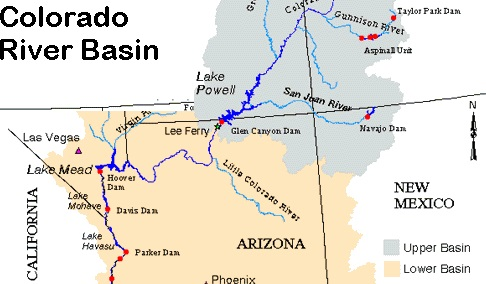

In [6]:
env_data

Trip Interval  Discharge  Water Temperature  Solar Insolation  \
0    Apr12-Jul12      10.46               9.80             54.28   
1    Jul12-Sep12      13.62              10.26             49.79   
2    Sep12-Oct12       8.61              10.53             29.11   
3    Oct12-Dec12       8.43               9.95             13.84   
4    Dec12-Jan13      14.73               9.59             10.13   
5    Jan13-Apr13      11.63               7.85             23.48   
6    Apr13-Jul13       9.84               9.06             52.17   
7    Jul13-Sep13      13.66              10.38             50.99   
8    Sep13-Oct13      10.28              11.02             29.34   
9    Oct13-Dec13      10.45              11.02             13.48   
10   Dec13-Jan14       9.06               9.49             10.09   
11   Jan14-Apr14      11.10               8.35             23.11   
12   Apr14-Jul14       8.49              10.03             52.09   
13   Jul14-Sep14      12.46              12.87             50.02   
14   Sep14-Oct14      10.43              13.84             30.31   
15   Oct14-Dec14      12.26              13.63             15.40   
16   Dec14-Jan15      12.19              11.66             10.15   
17   Jan15-Apr15      12.45               9.51             23.04   
18   Apr15-Jul15      10.97               9.51             51.79   
19   Jul15-Sep15      14.99              11.97             51.41   
20   Sep15-Oct15      12.37              13.56             32.37   
21   Oct15-Dec15      10.05              13.45             15.97   
22   Dec15-Jan16      12.07              11.22             10.17   
23   Jan16-Apr16      13.09               8.79             22.19   
24   Apr16-Jul16      11.74               9.67             51.96   
25   Jul16-Sep16      14.86              12.17             50.97   
26   Sep16-Oct16      12.75              13.35             31.65   
27   Oct16-Jan17      11.99              12.90             12.97   
28   Jan17-Apr17      13.30               9.20             27.47   
29   Apr17-Jul17      10.74               9.95             54.19   
30   Jul17-Sep17      13.90              11.77             49.13   
31   Sep17-Oct17      11.00              12.70             26.37   
32   Oct17-Jan18      11.15              11.75             12.26   
33   Jan18-Apr18      13.62               9.21             30.57   
34   Apr18-Jul18      12.13              10.05             53.80   
35   Jul18-Sep18      13.81              11.25             52.16   
36   Sep18-Oct18      12.18              12.19             29.58   
37   Oct18-Feb18      11.79              10.45             12.28   
38   Feb18-Apr19      13.11               8.41             31.31   
39   Apr19-Jul19      12.41               9.86             53.67   
40   Jul19-Sep19      14.48              13.41             51.06   
41   Sep19-Nov19      11.88              14.66             28.23   
42   Nov19-Jan20      11.24              11.83             11.72   
43   Jan20-Jun20      11.51               9.03             39.26   
44   Jun20-Sep20      12.60              10.84             50.76   
45   Sep20-Nov20      10.85              11.90             26.05   
46   Nov20-Jan21      11.31              10.42             11.55   
47   Jan21-Apr21      11.82               8.24             30.75   
48   Apr21-Jun21      10.49              10.36             54.22   
49   Jun21-Sep21      12.24              14.04             49.05   
50   Sep21-Nov21       9.49              15.44             24.64   

    Soluble Reactive Phosphorous Concentration  Rainbow Trout Biomass  HFE  \
0                                     0.012938              10.350957    0   
1                                     0.010913              11.035601    0   
2                                     0.008508              11.223646    0   
3                                     0.007478              10.732699    1   
4                                     0.007975              13.012068    1  

In [7]:
fish_data

Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
0      2012-04-19    2012-07-05               -4.15                -5.19   
1      2012-04-19    2012-07-05               -4.15                -4.15   
2      2012-04-19    2012-07-05               -4.15                -4.15   
3      2012-04-19    2012-07-05               -4.15                -4.15   
4      2012-04-19    2012-07-05               -3.73                -3.91   
...           ...           ...                 ...                  ...   
9793   2021-09-24    2021-11-05               -3.55                -3.22   
9794   2021-09-24    2021-11-05               -3.22                -3.22   
9795   2021-09-24    2021-11-05               -3.04                -3.22   
9796   2021-09-24    2021-11-05               -2.93                -2.93   
9797   2021-09-24    2021-11-05               -3.04                -3.04   

      Time at Large  Forklength at Release  Forklength at Recapture  \
0                77                  337.0                      334   
1                77                  330.0                      329   
2                77                  344.0                      348   
3                77                  284.0                      287   
4                77                   93.0                      119   
...             ...                    ...                      ...   
9793             42                  350.0                      345   
9794             42                   80.0                       95   
9795             42                   85.0                      115   
9796             42                  155.0                      157   
9797             42                  350.0                      354   

      Weight at Release  Weight at Recapture  Length_Growth  Weight_Growth  
0                 378.0                331.0           -3.0          -47.0  
1                 322.0                307.0           -1.0          -15.0  
2                 373.0                445.0            4.0           72.0  
3                 198.0                175.0            3.0          -23.0  
4                   6.6                 20.0           26.0           13.4  
...                 ...                  ...            ...            ...  
9793              493.0                458.0           -5.0          -35.0  
9794                5.9                  9.7           15.0            3.8  
9795                7.9                 21.4           30.0           13.5  
9796               39.0                 39.0            2.0            0.0  
9797              406.0                459.0            4.0           53.0  

[9798 rows x 11 columns]

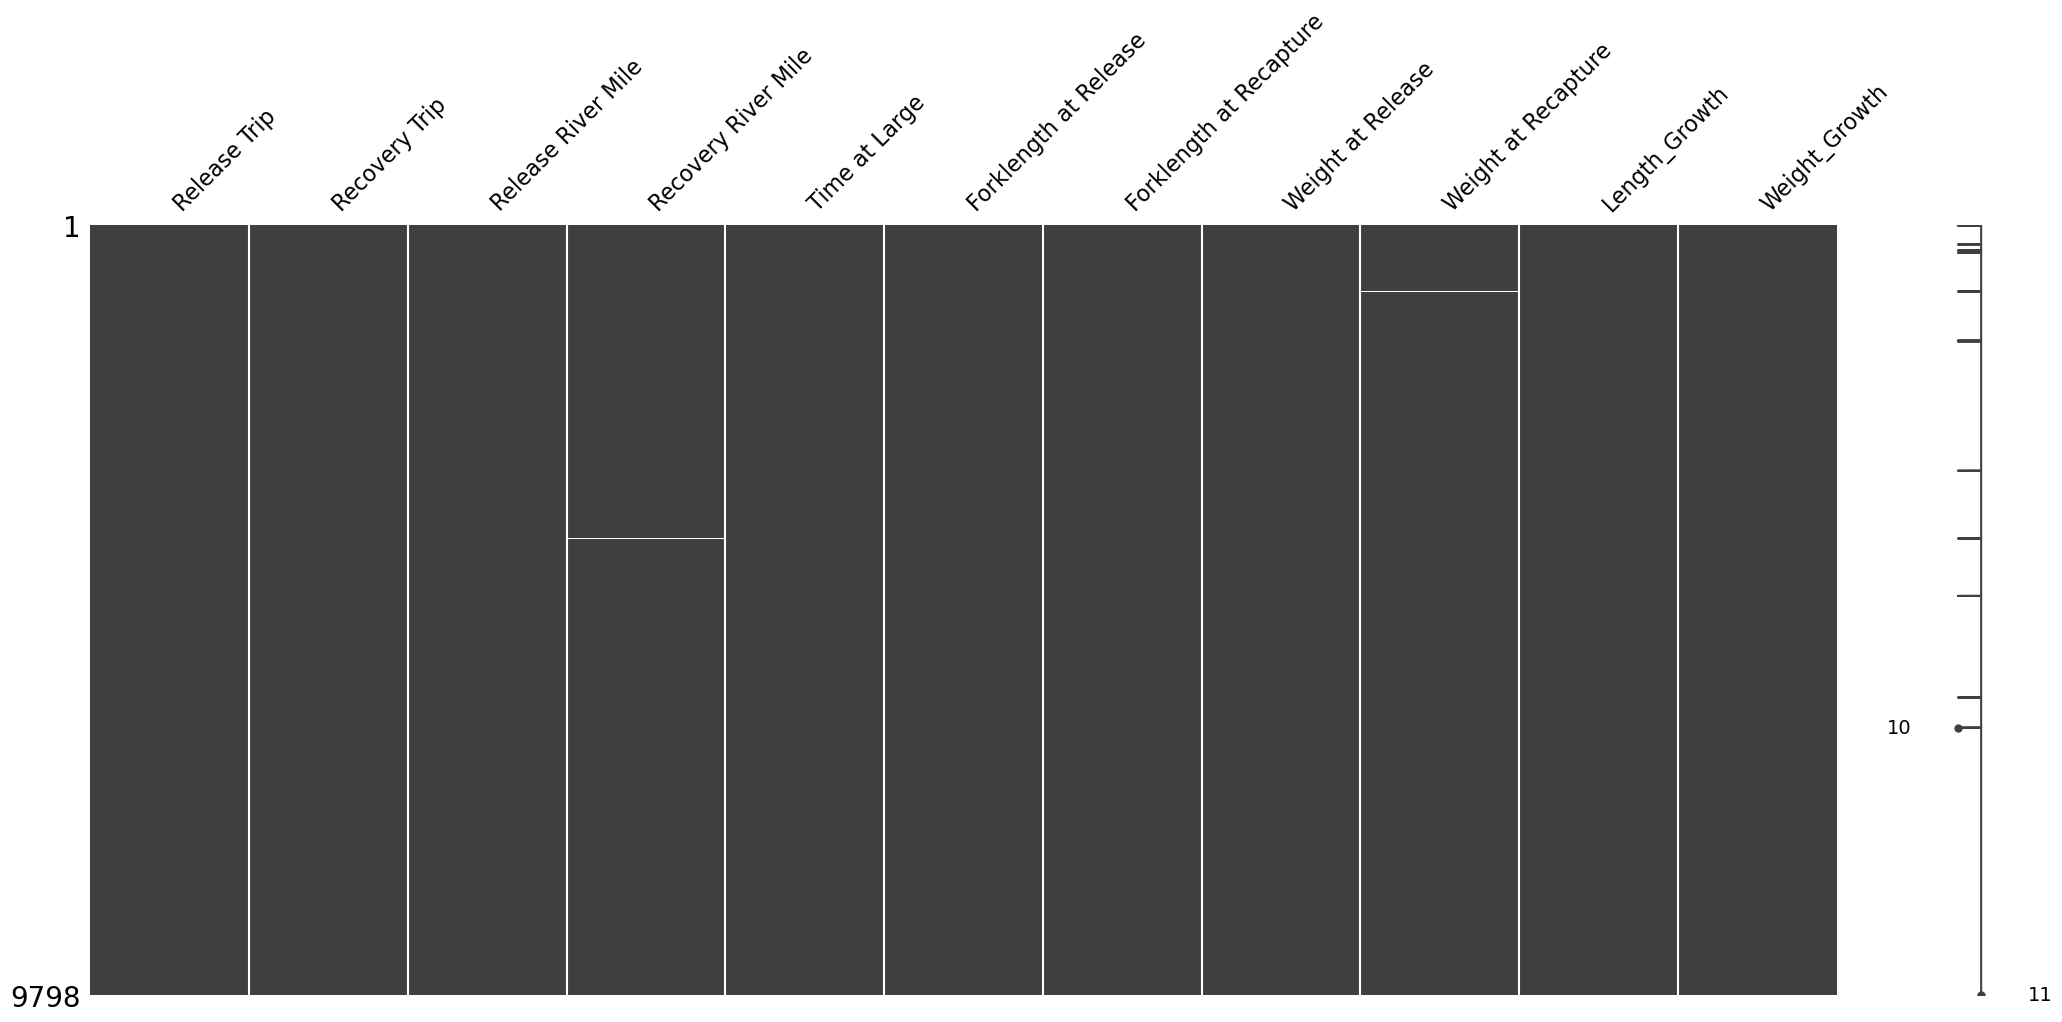

In [8]:
# NA map

msno.matrix(fish_data)

plt.show()

In [9]:
# Drop NAs

fish_data = fish_data.dropna()

### EDA

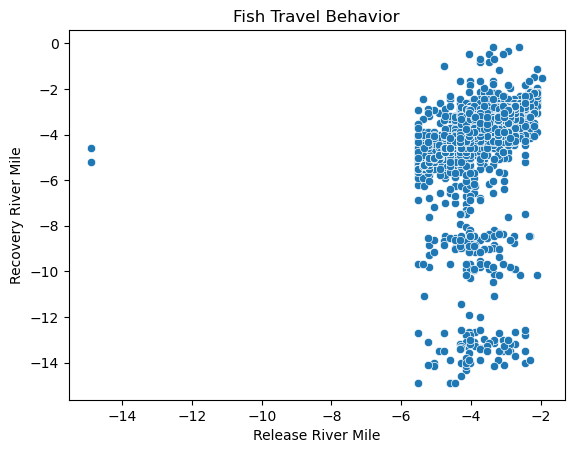

In [11]:
sns.scatterplot(x = 'Release River Mile', y = 'Recovery River Mile', data = fish_data)
plt.title('Fish Travel Behavior')
plt.show()

##### Three clusters are observed 
1. Majority of the fish did not move much further upstream since their initial release
3. Some swam against currents to be further upstream
4. Some swam even further

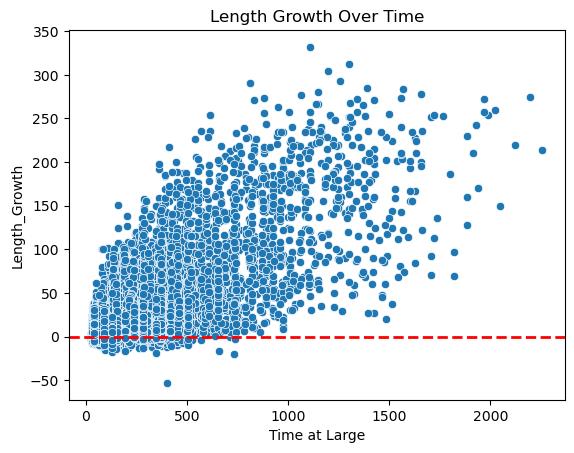

In [13]:
sns.scatterplot(x = 'Time at Large' , y = 'Length_Growth', data = fish_data)
plt.title('Length Growth Over Time')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Draw a vertical red line at x = 0
plt.show()

In [14]:
# Total number of fish with negative length growth

neg_len_growth_count = (fish_data['Length_Growth'] <= 0).sum()

total_fish = fish_data.shape[0]

neg_len_growth_percent = neg_len_growth_count / total_fish * 100

# Percentage of fish in the dataset with negative length growth 

neg_len_growth_percent.round(2)

16.08

1. Growth in length tends to correlate with more time in between release and recapture
2. 16.08% of sample that experienced negative length growth could be stemed from genetic issues and other diseases

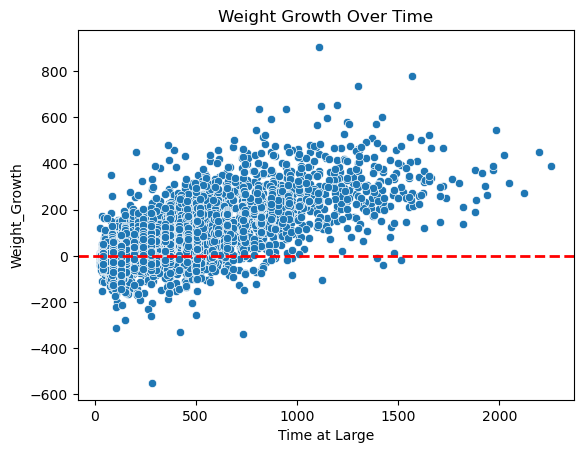

In [16]:
sns.scatterplot(x = 'Time at Large' , y = 'Weight_Growth', data = fish_data)
plt.title('Weight Growth Over Time')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Draw a vertical red line at x = 0
plt.show()

In [17]:
# Total number of fish with negative length growth

neg_wei_growth_count = (fish_data['Weight_Growth'] <= 0).sum()

neg_wei_growth_percent = neg_wei_growth_count / total_fish * 100

# Percentage of fish in the dataset with negative weight growth 

neg_wei_growth_percent.round(2)

23.28

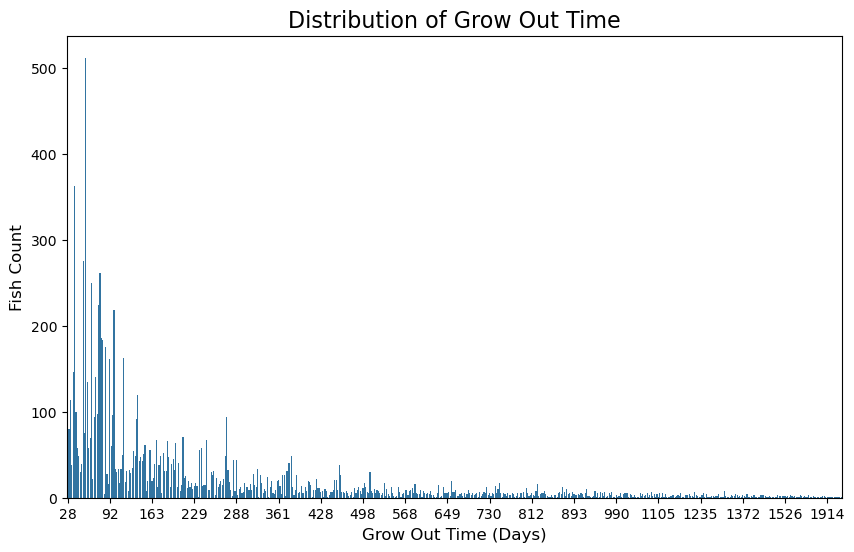

In [18]:
# Calculate the frequency of each unique value in 'Time at Large'

time_at_large_counts = fish_data['Time at Large'].value_counts().reset_index()

# Rename columns for better readability

time_at_large_counts.columns = ['Grow out time', 'Count']

# Create a barplot

plt.figure(figsize=(10,6))

sns.barplot(x='Grow out time', y='Count', data=time_at_large_counts)

plt.title('Distribution of Grow Out Time', fontsize=16)

plt.xlabel('Grow Out Time (Days)', fontsize=12)

plt.ylabel('Fish Count', fontsize=12)

ticks = plt.gca().get_xticks()  # Get current tick positions

plt.xticks(ticks[::30])  # Display every 200th label

plt.show()

In [19]:
# Select fish that were recaptured in the first year after initial release 

recap_first_year = time_at_large_counts[time_at_large_counts['Grow out time'] <= 365]

# Percentage of trout recaptured in a year after its initial release (grow out time <= 365)

round((recap_first_year['Count'].sum()) / total_fish * 100, 2)

79.54

In [20]:
# Select fish that were recaptured in the second year after initial release

recap_sec_year = time_at_large_counts[(time_at_large_counts['Grow out time'] >= 365) & (time_at_large_counts['Grow out time'] <= 730)]

# Percentage of trout recaptured in the second year after its initial release

round((recap_sec_year['Count'].sum()) / total_fish * 100, 2)

12.9

In [21]:
# Select fish that were recaptured in the third year after initial release

recap_third_year = time_at_large_counts[(time_at_large_counts['Grow out time'] >= 730) & (time_at_large_counts['Grow out time'] <= 1095)]

# Percentage of trout recaptured in the third year after its initial release

round((recap_third_year['Count'].sum()) / total_fish * 100, 2)

5.01

#### Estimation of Age

In [23]:
# Create a new dataframe with an estimation of fish's age 

# Define the conditions for each age group using 'leng at release'

conditions = [
    
    # Age 0: Less than 280
    (fish_data['Forklength at Release'] < 280),         
    
    # Age 1: Between 280 and 370
    (fish_data['Forklength at Release'] >= 280) & (fish_data['Forklength at Release'] < 370),  
    
    # Age 2: Between 370 and 420
    (fish_data['Forklength at Release'] >= 370) & (fish_data['Forklength at Release'] < 420),

    # Age 3 : Above 420
    (fish_data['Forklength at Release'] >420)

]

# Define the corresponding age values for each condition
    
age_values = [0, 1, 2, 3]

# Create the "age" variable by applying the conditions
          
fish_data2 = fish_data.copy()  
          
fish_data2['Age_at_Release'] = np.select(conditions, age_values, default=np.nan)

# Print

fish_data2

Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
0      2012-04-19    2012-07-05               -4.15                -5.19   
1      2012-04-19    2012-07-05               -4.15                -4.15   
2      2012-04-19    2012-07-05               -4.15                -4.15   
3      2012-04-19    2012-07-05               -4.15                -4.15   
4      2012-04-19    2012-07-05               -3.73                -3.91   
...           ...           ...                 ...                  ...   
9793   2021-09-24    2021-11-05               -3.55                -3.22   
9794   2021-09-24    2021-11-05               -3.22                -3.22   
9795   2021-09-24    2021-11-05               -3.04                -3.22   
9796   2021-09-24    2021-11-05               -2.93                -2.93   
9797   2021-09-24    2021-11-05               -3.04                -3.04   

      Time at Large  Forklength at Release  Forklength at Recapture  \
0                77                  337.0                      334   
1                77                  330.0                      329   
2                77                  344.0                      348   
3                77                  284.0                      287   
4                77                   93.0                      119   
...             ...                    ...                      ...   
9793             42                  350.0                      345   
9794             42                   80.0                       95   
9795             42                   85.0                      115   
9796             42                  155.0                      157   
9797             42                  350.0                      354   

      Weight at Release  Weight at Recapture  Length_Growth  Weight_Growth  \
0                 378.0                331.0           -3.0          -47.0   
1                 322.0                307.0           -1.0          -15.0   
2                 373.0                445.0            4.0           72.0   
3                 198.0                175.0            3.0          -23.0   
4                   6.6                 20.0           26.0           13.4   
...                 ...                  ...            ...            ...   
9793              493.0                458.0           -5.0          -35.0   
9794                5.9                  9.7           15.0            3.8   
9795                7.9                 21.4           30.0           13.5   
9796               39.0                 39.0            2.0            0.0   
9797              406.0                459.0            4.0           53.0   

      Age_at_Release  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                0.0  
...              ...  
9793             1.0  
9794             0.0  
9795             0.0  
9796             0.0  
9797             1.0  

[9785 rows x 12 columns]

In [24]:
# Calculate the frequency of each age group at 

age_counts = fish_data2['Age_at_Release'].value_counts().reset_index()

age_counts # Sum of counts are 9797

Age_at_Release  count
0             0.0   7813
1             1.0   1878
2             2.0     87
3             3.0      6

##### Parr Dataset 

In [26]:
# Create a dataframe for parr that are recaptured within a year after initial release

parr_data = fish_data2[(fish_data2['Age_at_Release'] == 0) & (fish_data2['Time at Large'] <= 365)]

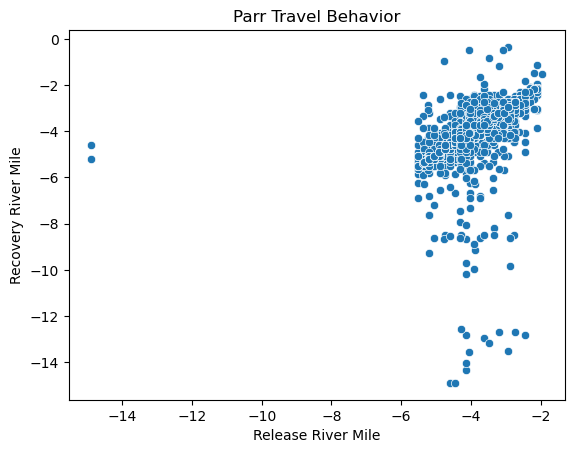

In [27]:
sns.scatterplot(x = 'Release River Mile', y = 'Recovery River Mile', data = parr_data)
plt.title('Parr Travel Behavior')
plt.show()

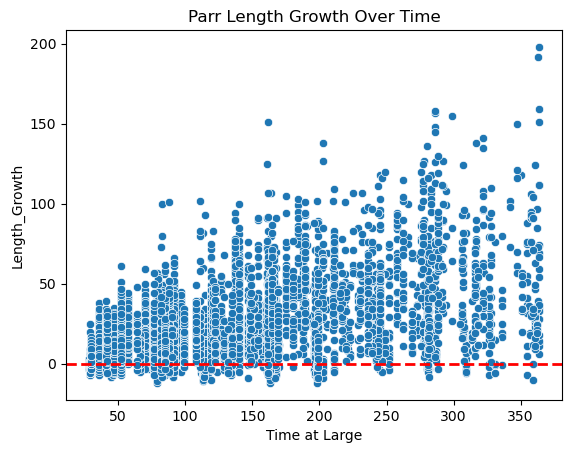

In [28]:
sns.scatterplot(x = 'Time at Large' , y = 'Length_Growth', data = parr_data)
plt.title('Parr Length Growth Over Time')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Draw a vertical red line at x = 0
plt.show()

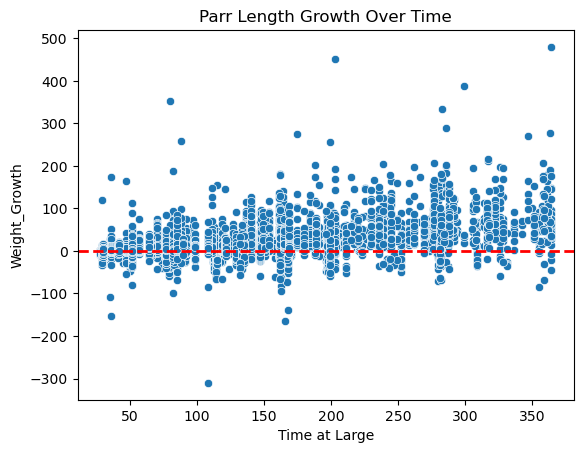

In [29]:
sns.scatterplot(x = 'Time at Large' , y = 'Weight_Growth', data = parr_data)
plt.title('Parr Length Growth Over Time')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Draw a vertical red line at x = 0
plt.show()

##### Analysis on why some parrs traveled more upstream
- What are the common features of these parrs?
- What caused them to be able to travel further against the currents?

In [31]:
# Add new variable that measure how far each parr traveled 

parr_data.loc[:, 'Distance_Traveled'] = abs(parr_data['Release River Mile']) - abs(parr_data['Recovery River Mile'])

parr_data

/var/folders/0x/ry77ppt564g_7fms7vcmt7nw0000gn/T/ipykernel_2322/3481799553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parr_data.loc[:, 'Distance_Traveled'] = abs(parr_data['Release River Mile']) - abs(parr_data['Recovery River Mile'])


Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
4      2012-04-19    2012-07-05               -3.73                -3.91   
5      2012-04-19    2012-07-05               -4.15                -4.15   
10     2012-04-19    2012-09-13               -4.15                -4.31   
11     2012-04-19    2012-12-08               -4.15                -5.79   
12     2012-04-19    2013-01-10               -4.31                -4.45   
...           ...           ...                 ...                  ...   
9785   2021-09-24    2021-11-05               -4.15                -3.75   
9792   2021-09-24    2021-11-05               -3.04                -3.22   
9794   2021-09-24    2021-11-05               -3.22                -3.22   
9795   2021-09-24    2021-11-05               -3.04                -3.22   
9796   2021-09-24    2021-11-05               -2.93                -2.93   

      Time at Large  Forklength at Release  Forklength at Recapture  \
4                77                   93.0                      119   
5                77                   99.0                      107   
10              147                  138.0                      214   
11              233                  115.0                      211   
12              266                  169.0                      248   
...             ...                    ...                      ...   
9785             42                   84.0                      117   
9792             42                   83.0                      108   
9794             42                   80.0                       95   
9795             42                   85.0                      115   
9796             42                  155.0                      157   

      Weight at Release  Weight at Recapture  Length_Growth  Weight_Growth  \
4                   6.6                 20.0           26.0           13.4   
5                   9.0                 16.0            8.0            7.0   
10                 27.5                120.0           76.0           92.5   
11                 15.5                 86.7           96.0           71.2   
12                 62.0                167.0           79.0          105.0   
...                 ...                  ...            ...            ...   
9785                6.8                 19.0           33.0           12.2   
9792                7.3                 19.4           25.0           12.1   
9794                5.9                  9.7           15.0            3.8   
9795                7.9                 21.4           30.0           13.5   
9796               39.0                 39.0            2.0            0.0   

      Age_at_Release  Distance_Traveled  
4                0.0              -0.18  
5                0.0               0.00  
10               0.0              -0.16  
11               0.0              -1.64  
12               0.0              -0.14  
...              ...                ...  
9785             0.0               0.40  
9792             0.0              -0.18  
9794             0.0               0.00  
9795             0.0              -0.18  
9796             0.0               0.00  

[6257 rows x 13 columns]

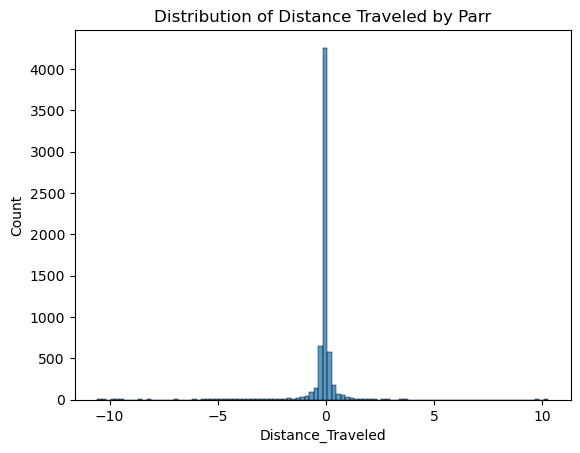

In [32]:
# Distribution of how far parrs traveled

sns.histplot(parr_data['Distance_Traveled'], kde=False, bins=100)

plt.title('Distribution of Distance Traveled by Parr')

plt.show()

In [33]:
# Most parrs did not travel more than 2 miles upstream
# Using 2 mile upstream as a threshold, creating dataframe for long distance travelers 

long_dis_parr_data = parr_data[(parr_data['Distance_Traveled'] <= -2)]

long_dis_parr_data

Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
183    2012-09-13    2012-10-25               -4.31                -7.93   
226    2012-10-25    2012-12-08               -5.07                -7.19   
308    2012-10-25    2013-06-25               -2.45                -4.45   
522    2013-01-10    2013-12-12               -4.15               -14.31   
523    2013-01-10    2013-12-12               -5.19                -7.62   
913    2013-09-12    2013-12-12               -4.15                -8.07   
1448   2014-04-03    2014-06-26               -3.49                -5.51   
1613   2014-06-26    2014-10-17               -2.45               -12.81   
1645   2014-06-26    2014-12-06               -5.19                -9.27   
1646   2014-06-26    2014-12-06               -4.02                -7.31   
1647   2014-06-26    2014-12-06               -4.45                -6.68   
1649   2014-06-26    2014-12-06               -4.02                -6.23   
1686   2014-09-18    2014-10-17               -5.19                -7.63   
1692   2014-09-18    2014-10-17               -2.93                -5.05   
1766   2014-09-18    2014-12-06               -4.02                -6.68   
1767   2014-09-18    2014-12-06               -3.88                -6.27   
1847   2014-10-17    2014-12-06               -3.73                -8.61   
1848   2014-10-17    2014-12-06               -4.75                -8.47   
1849   2014-10-17    2014-12-06               -3.34                -8.19   
1850   2014-10-17    2014-12-06               -3.75                -6.80   
1987   2014-10-17    2015-10-16               -4.76                -8.67   
1989   2014-10-17    2015-10-16               -3.04                -5.68   
2188   2014-12-06    2015-06-23               -3.04                -5.05   
2354   2015-01-10    2015-10-16               -4.15               -12.81   
2356   2015-01-10    2015-10-16               -3.38                -6.04   
2527   2015-04-02    2015-12-02               -3.73                -6.87   
2620   2015-06-23    2015-10-16               -3.91                -6.15   
2670   2015-06-23    2015-12-02               -4.61               -14.89   
2755   2015-09-10    2015-10-16               -5.07                -8.61   
2857   2015-09-10    2015-12-02               -2.93                -7.62   
2991   2015-10-16    2015-12-02               -4.15                -8.67   
2993   2015-10-16    2015-12-02               -4.31                -7.47   
2995   2015-10-16    2015-12-02               -3.38                -6.55   
3037   2015-10-16    2015-12-02               -4.02                -6.87   
3039   2015-10-16    2015-12-02               -3.20                -5.65   
3177   2015-10-16    2015-12-02               -4.46               -14.89   
4631   2016-06-30    2016-09-08               -2.45                -4.91   
5477   2017-01-07    2017-10-26               -4.61                -8.52   
5760   2017-04-25    2018-01-26               -3.88                -9.15   
6554   2018-01-26    2018-04-24               -4.30                -8.47   
6611   2018-01-26    2018-09-08               -4.15                -9.69   
6979   2018-04-24    2019-04-17               -3.91                -9.96   
7161   2018-06-15    2019-02-06               -3.34                -8.47   
7187   2018-06-15    2019-04-17               -2.88                -9.81   
7398   2018-09-08    2019-04-17               -2.78                -8.47   
7399   2018-09-08    2019-04-17               -3.62               -12.95   
7653   2018-10-30    2019-09-11               -4.06               -13.56   
7920   2019-02-06    2020-01-23               -4.15               -10.17   
8118   2019-04-17    2020-01-23               -3.62                -8.47   
8252   2019-06-26    2019-11-02               -4.31                -8.61   
8469   2019-09-11    2020-01-23               -2.88                -8.61   
8523   2019-09-11    2020-06-19               -2.93  

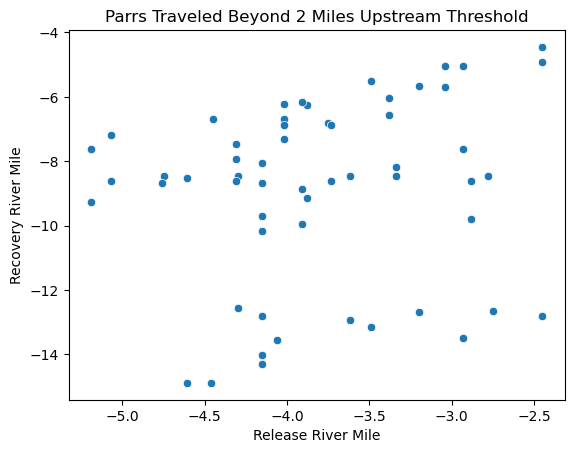

In [34]:
sns.scatterplot(x = 'Release River Mile', y = 'Recovery River Mile', data = long_dis_parr_data)

plt.title('Parrs Traveled Beyond 2 Miles Upstream Threshold')

plt.show()

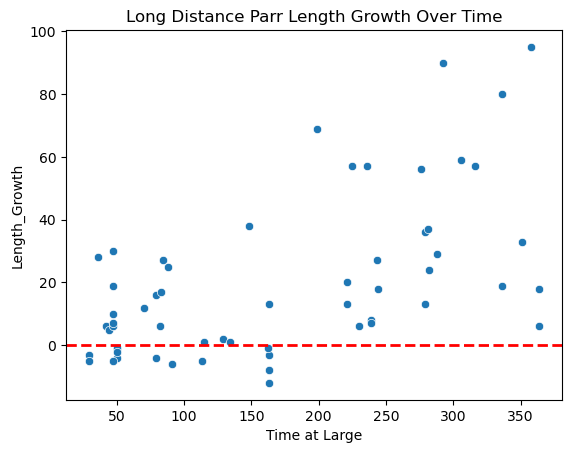

In [35]:
sns.scatterplot(x = 'Time at Large' , y = 'Length_Growth', data = long_dis_parr_data)
plt.title('Long Distance Parr Length Growth Over Time')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Draw a vertical red line at x = 0
plt.show()

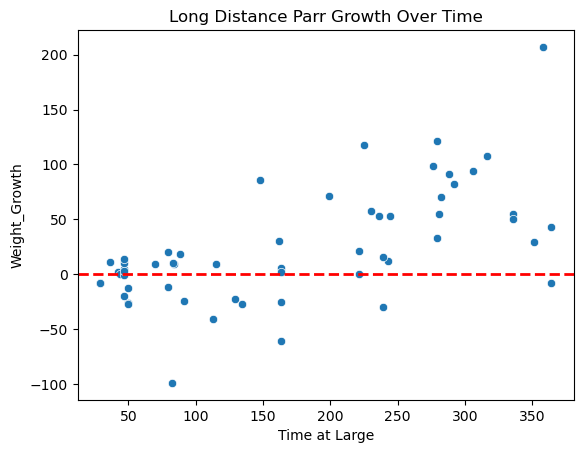

In [36]:
sns.scatterplot(x = 'Time at Large' , y = 'Weight_Growth', data = long_dis_parr_data)
plt.title('Long Distance Parr Growth Over Time')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Draw a vertical red line at x = 0
plt.show()

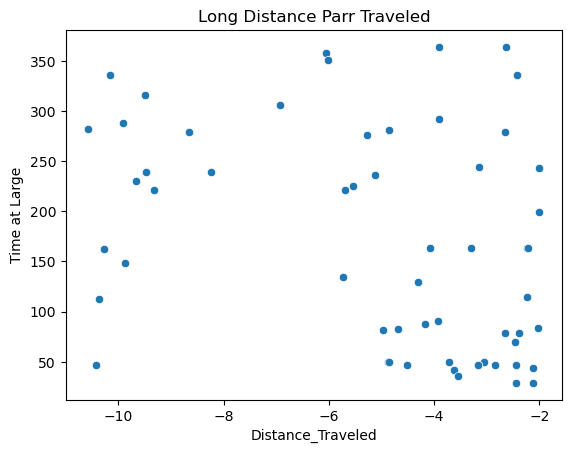

In [37]:
sns.scatterplot(x = 'Distance_Traveled', y = 'Time at Large' , data = long_dis_parr_data)
plt.title('Long Distance Parr Traveled')
plt.show()

/var/folders/0x/ry77ppt564g_7fms7vcmt7nw0000gn/T/ipykernel_2322/3808630731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_dis_parr_data.loc[:, 'color'] = long_dis_parr_data['Weight_Growth'].apply(lambda x: 'red' if x < 0 else 'blue')


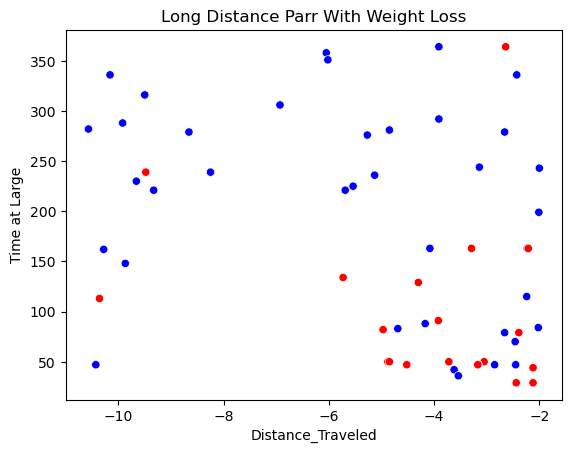

In [38]:
# Use .loc[] to safely assign a new column
long_dis_parr_data.loc[:, 'color'] = long_dis_parr_data['Weight_Growth'].apply(lambda x: 'red' if x < 0 else 'blue')

# Plot the scatter plot with different colors
sns.scatterplot(x='Distance_Traveled', 
                y='Time at Large', 
                data=long_dis_parr_data, 
                hue='color',  # Use the 'color' column to differentiate points
                palette={'red': 'red', 'blue': 'blue'},  # Define colors
                legend=False)  # Remove legend if not needed

# Add title and horizontal line
plt.title('Long Distance Parr With Weight Loss')
plt.show()

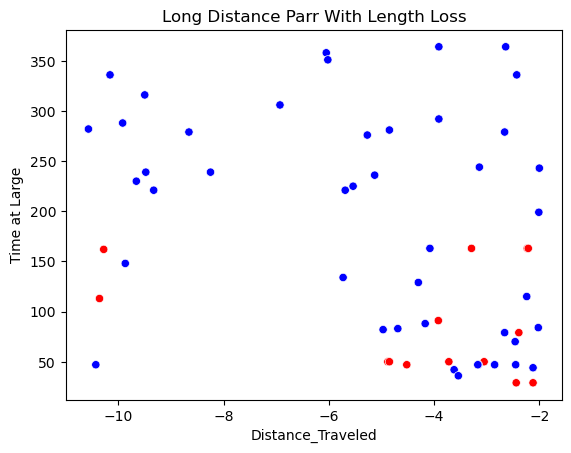

In [39]:
# Use .loc[] to safely assign a new column
long_dis_parr_data.loc[:, 'color'] = long_dis_parr_data['Length_Growth'].apply(lambda x: 'red' if x < 0 else 'blue')

# Plot the scatter plot with different colors
sns.scatterplot(x='Distance_Traveled', 
                y='Time at Large', 
                data=long_dis_parr_data, 
                hue='color',  # Use the 'color' column to differentiate points
                palette={'red': 'red', 'blue': 'blue'},  # Define colors
                legend=False)  # Remove legend if not needed

# Add title and horizontal line
plt.title('Long Distance Parr With Length Loss')
plt.show()

In [40]:
# Find the observation with the highest Weight_Growth
long_dis_parr_data.loc[long_dis_parr_data['Weight_Growth'].idxmax()]

Release Trip               2018-04-24 00:00:00
Recovery Trip              2019-04-17 00:00:00
Release River Mile                       -3.91
Recovery River Mile                      -9.96
Time at Large                              358
Forklength at Release                    189.0
Forklength at Recapture                    284
Weight at Release                         95.0
Weight at Recapture                      302.0
Length_Growth                             95.0
Weight_Growth                            207.0
Age_at_Release                             0.0
Distance_Traveled                        -6.05
color                                     blue
Name: 6979, dtype: object

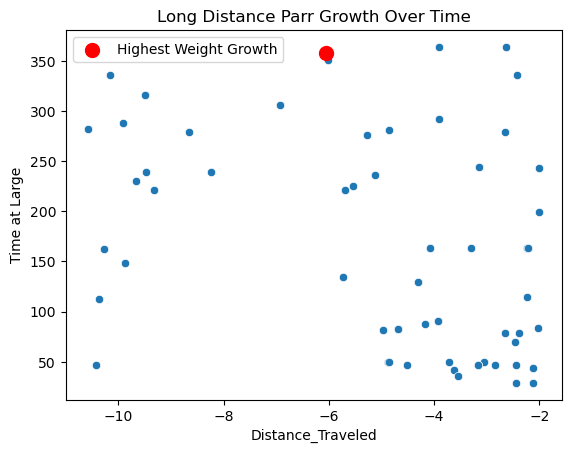

In [41]:
# Find the observation with the highest Weight_Growth
highest_weight_growth_obs = long_dis_parr_data.loc[long_dis_parr_data['Weight_Growth'].idxmax()]

# Plot scatterplot
sns.scatterplot(x = 'Distance_Traveled', y = 'Time at Large' , data = long_dis_parr_data)
plt.title('Long Distance Parr Growth Over Time')

# Highlight the point with the highest Weight_Growth in red
plt.scatter(highest_weight_growth_obs['Distance_Traveled'], 
            highest_weight_growth_obs['Time at Large'], 
            color='red', s=100, label='Highest Weight Growth')

plt.legend()  # Add a legend to the plot
plt.show()


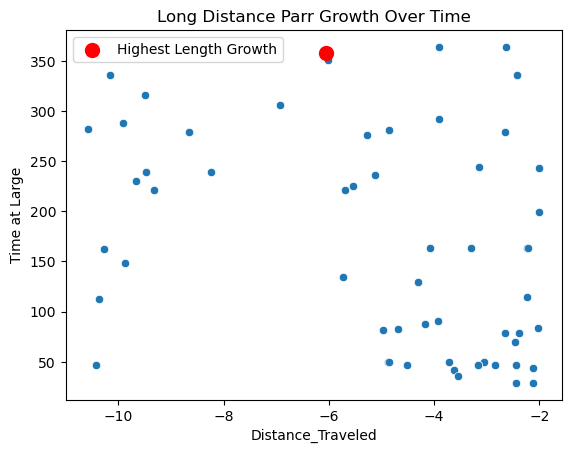

In [42]:
# Find the observation with the highest Weight_Growth
highest_length_growth_obs = long_dis_parr_data.loc[long_dis_parr_data['Length_Growth'].idxmax()]

# Plot scatterplot
sns.scatterplot(x = 'Distance_Traveled', y = 'Time at Large' , data = long_dis_parr_data)
plt.title('Long Distance Parr Growth Over Time')

# Highlight the point with the highest Weight_Growth in red
plt.scatter(highest_weight_growth_obs['Distance_Traveled'], 
            highest_weight_growth_obs['Time at Large'], 
            color='red', s=100, label='Highest Length Growth')

plt.legend()  # Add a legend to the plot
plt.show()

In [43]:
parr_data.loc[:, 'Average_Daily_Weight_Growth'] = parr_data['Weight_Growth'] / parr_data['Time at Large']

parr_data

/var/folders/0x/ry77ppt564g_7fms7vcmt7nw0000gn/T/ipykernel_2322/1483743681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parr_data.loc[:, 'Average_Daily_Weight_Growth'] = parr_data['Weight_Growth'] / parr_data['Time at Large']


Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
4      2012-04-19    2012-07-05               -3.73                -3.91   
5      2012-04-19    2012-07-05               -4.15                -4.15   
10     2012-04-19    2012-09-13               -4.15                -4.31   
11     2012-04-19    2012-12-08               -4.15                -5.79   
12     2012-04-19    2013-01-10               -4.31                -4.45   
...           ...           ...                 ...                  ...   
9785   2021-09-24    2021-11-05               -4.15                -3.75   
9792   2021-09-24    2021-11-05               -3.04                -3.22   
9794   2021-09-24    2021-11-05               -3.22                -3.22   
9795   2021-09-24    2021-11-05               -3.04                -3.22   
9796   2021-09-24    2021-11-05               -2.93                -2.93   

      Time at Large  Forklength at Release  Forklength at Recapture  \
4                77                   93.0                      119   
5                77                   99.0                      107   
10              147                  138.0                      214   
11              233                  115.0                      211   
12              266                  169.0                      248   
...             ...                    ...                      ...   
9785             42                   84.0                      117   
9792             42                   83.0                      108   
9794             42                   80.0                       95   
9795             42                   85.0                      115   
9796             42                  155.0                      157   

      Weight at Release  Weight at Recapture  Length_Growth  Weight_Growth  \
4                   6.6                 20.0           26.0           13.4   
5                   9.0                 16.0            8.0            7.0   
10                 27.5                120.0           76.0           92.5   
11                 15.5                 86.7           96.0           71.2   
12                 62.0                167.0           79.0          105.0   
...                 ...                  ...            ...            ...   
9785                6.8                 19.0           33.0           12.2   
9792                7.3                 19.4           25.0           12.1   
9794                5.9                  9.7           15.0            3.8   
9795                7.9                 21.4           30.0           13.5   
9796               39.0                 39.0            2.0            0.0   

      Age_at_Release  Distance_Traveled  Average_Daily_Weight_Growth  
4                0.0              -0.18                     0.174026  
5                0.0               0.00                     0.090909  
10               0.0              -0.16                     0.629252  
11               0.0              -1.64                     0.305579  
12               0.0              -0.14                     0.394737  
...              ...                ...                          ...  
9785             0.0               0.40                     0.290476  
9792             0.0              -0.18                     0.288095  
9794             0.0               0.00                     0.090476  
9795             0.0              -0.18                     0.321429  
9796             0.0               0.00                     0.000000  

[6257 rows x 14 columns]

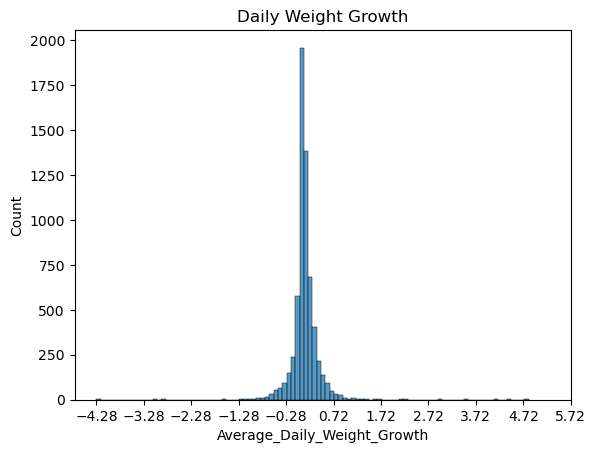

In [44]:
sns.histplot(x=parr_data['Average_Daily_Weight_Growth'], kde=False, bins=100)

plt.title('Daily Weight Growth')

plt.xticks(np.arange(min(parr_data['Average_Daily_Weight_Growth']), 
           max(parr_data['Average_Daily_Weight_Growth']) + 1, 
           1))

plt.show()

In [45]:
parr_data['Average_Daily_Weight_Growth'].mode()

0    0.0
Name: Average_Daily_Weight_Growth, dtype: float64

In [46]:
parr_data['Average_Daily_Weight_Growth'].mean()

0.1105750871793991

In [47]:
parr_data['Average_Daily_Weight_Growth'].median()

0.09148936170212764

#### Modeling objective:

What factors (environmental and internal factors) causes parr to gain weight at an above average level?
- 0.1 ~ 0.8 grams per day

#### Side Note: Wild v.s. Farmed Raised - Growth Rate Comparison 

In [50]:
# assuming average daily weight gain is 0.1, total weight gains in a year (in grams) - Wild

0.1 * 365

36.5

In [51]:
# assuming average daily weight gain is 0.8, total weight gains in a year (in grams) - Wild

0.8 * 365

292.0

 1 (lb) = 453.592 (g) \
 current market price of rainbow trout per pond : $ 7.99 ~ 10

In [53]:
days = 454/0.8

# months requires to reach one pound (fastest growing rate) - Wild

round(days/30, 2) # 1 year and 6 months

18.92

In [54]:
days = 454/0.1

# months requires to reach one pound (slow growing rate) - Wild

round(days/30, 2)  # 13 years

151.33

In [55]:
# Current fastest growing rate (farm raised)
# x = pounds need to be gain daily to be harvested as a one-pound fish after exactly a year

x = 454 / (12*30)

round(x,2)

1.26

##### Does traveling further upstream help parrs to gain more weight?

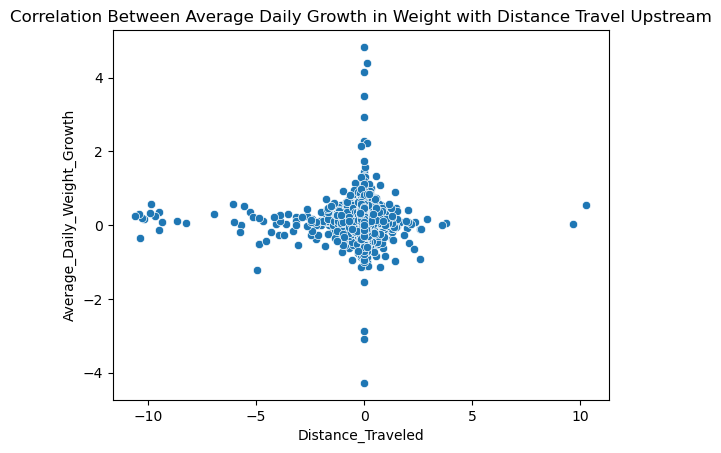

In [57]:
sns.scatterplot(x="Distance_Traveled", y = "Average_Daily_Weight_Growth", data = parr_data)
plt.title('Correlation Between Average Daily Growth in Weight with Distance Travel Upstream')
plt.show()

- No, traveling further upsteam does not lead to more weight growth
- Best/higher growth rate in weight occur among parrs that stay more or less stationary
- Most parrs are stationary 

In [59]:
env_data

Trip Interval  Discharge  Water Temperature  Solar Insolation  \
0    Apr12-Jul12      10.46               9.80             54.28   
1    Jul12-Sep12      13.62              10.26             49.79   
2    Sep12-Oct12       8.61              10.53             29.11   
3    Oct12-Dec12       8.43               9.95             13.84   
4    Dec12-Jan13      14.73               9.59             10.13   
5    Jan13-Apr13      11.63               7.85             23.48   
6    Apr13-Jul13       9.84               9.06             52.17   
7    Jul13-Sep13      13.66              10.38             50.99   
8    Sep13-Oct13      10.28              11.02             29.34   
9    Oct13-Dec13      10.45              11.02             13.48   
10   Dec13-Jan14       9.06               9.49             10.09   
11   Jan14-Apr14      11.10               8.35             23.11   
12   Apr14-Jul14       8.49              10.03             52.09   
13   Jul14-Sep14      12.46              12.87             50.02   
14   Sep14-Oct14      10.43              13.84             30.31   
15   Oct14-Dec14      12.26              13.63             15.40   
16   Dec14-Jan15      12.19              11.66             10.15   
17   Jan15-Apr15      12.45               9.51             23.04   
18   Apr15-Jul15      10.97               9.51             51.79   
19   Jul15-Sep15      14.99              11.97             51.41   
20   Sep15-Oct15      12.37              13.56             32.37   
21   Oct15-Dec15      10.05              13.45             15.97   
22   Dec15-Jan16      12.07              11.22             10.17   
23   Jan16-Apr16      13.09               8.79             22.19   
24   Apr16-Jul16      11.74               9.67             51.96   
25   Jul16-Sep16      14.86              12.17             50.97   
26   Sep16-Oct16      12.75              13.35             31.65   
27   Oct16-Jan17      11.99              12.90             12.97   
28   Jan17-Apr17      13.30               9.20             27.47   
29   Apr17-Jul17      10.74               9.95             54.19   
30   Jul17-Sep17      13.90              11.77             49.13   
31   Sep17-Oct17      11.00              12.70             26.37   
32   Oct17-Jan18      11.15              11.75             12.26   
33   Jan18-Apr18      13.62               9.21             30.57   
34   Apr18-Jul18      12.13              10.05             53.80   
35   Jul18-Sep18      13.81              11.25             52.16   
36   Sep18-Oct18      12.18              12.19             29.58   
37   Oct18-Feb18      11.79              10.45             12.28   
38   Feb18-Apr19      13.11               8.41             31.31   
39   Apr19-Jul19      12.41               9.86             53.67   
40   Jul19-Sep19      14.48              13.41             51.06   
41   Sep19-Nov19      11.88              14.66             28.23   
42   Nov19-Jan20      11.24              11.83             11.72   
43   Jan20-Jun20      11.51               9.03             39.26   
44   Jun20-Sep20      12.60              10.84             50.76   
45   Sep20-Nov20      10.85              11.90             26.05   
46   Nov20-Jan21      11.31              10.42             11.55   
47   Jan21-Apr21      11.82               8.24             30.75   
48   Apr21-Jun21      10.49              10.36             54.22   
49   Jun21-Sep21      12.24              14.04             49.05   
50   Sep21-Nov21       9.49              15.44             24.64   

    Soluble Reactive Phosphorous Concentration  Rainbow Trout Biomass  HFE  \
0                                     0.012938              10.350957    0   
1                                     0.010913              11.035601    0   
2                                     0.008508              11.223646    0   
3                                     0.007478              10.732699    1   
4                                     0.007975              13.012068    1  

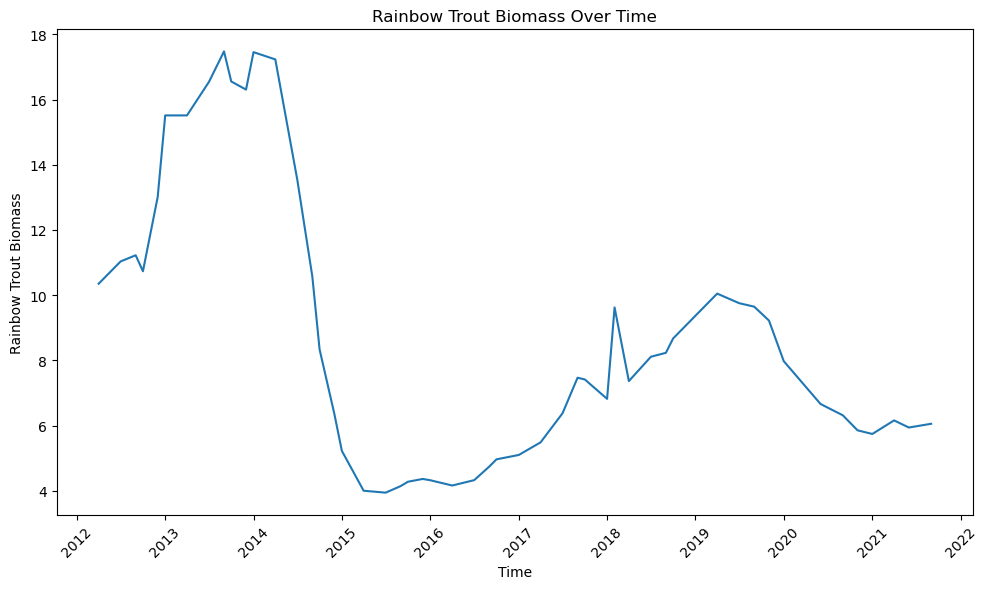

In [60]:
# Extract the start of each "Trip Interval"

env_data['Trip Start'] = env_data['Trip Interval'].str.split('-').str[0]  # Extract first date

env_data['Trip Start'] = pd.to_datetime(env_data['Trip Start'], format='%b%y')  # Convert to datetime format

env_data['Trip End'] = env_data['Trip Interval'].str.split('-').str[1]  # Extract second date

env_data['Trip End'] = pd.to_datetime(env_data['Trip End'], format='%b%y')

# plot biomass over time

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Rainbow Trout Biomass', data=env_data)

plt.title('Rainbow Trout Biomass Over Time')

plt.xlabel('Time')

plt.ylabel('Rainbow Trout Biomass')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

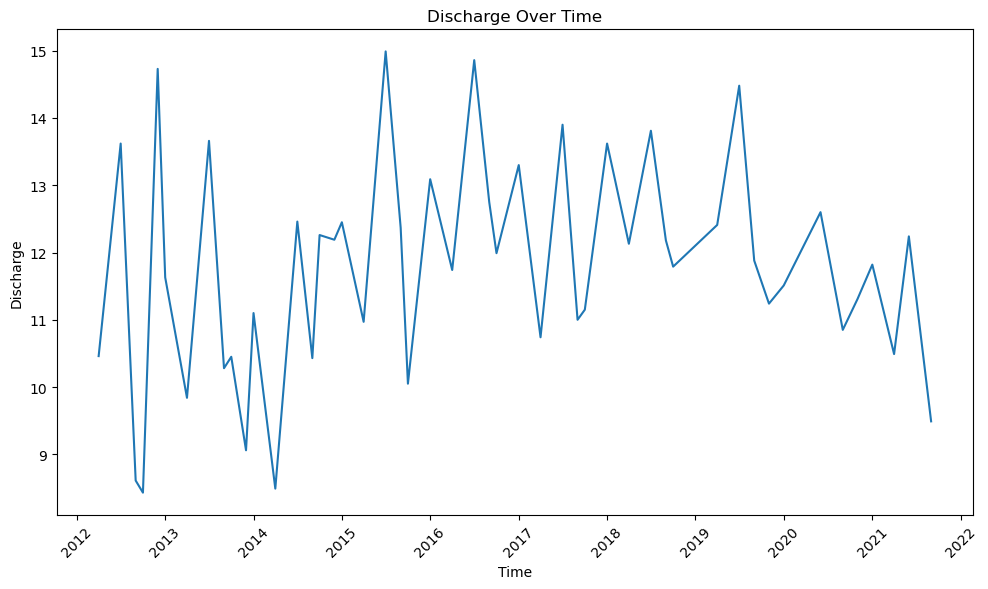

In [61]:
# plot biomass over time

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Discharge', data=env_data)

plt.title('Discharge Over Time')

plt.xlabel('Time')

plt.ylabel('Discharge')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

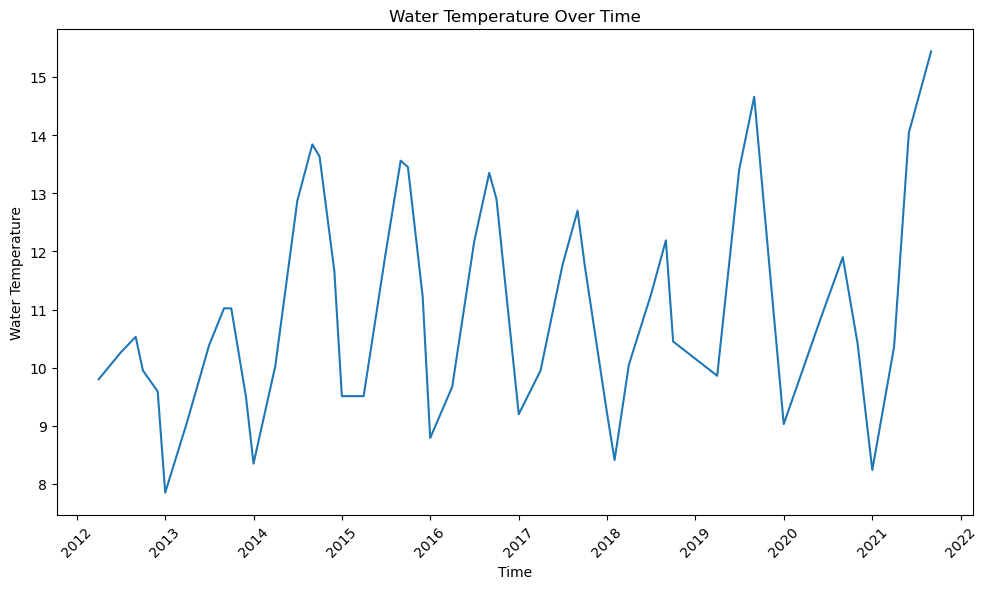

In [62]:
# Plot water temperature over time

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Water Temperature', data=env_data)

plt.title('Water Temperature Over Time')

plt.xlabel('Time')

plt.ylabel('Water Temperature')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

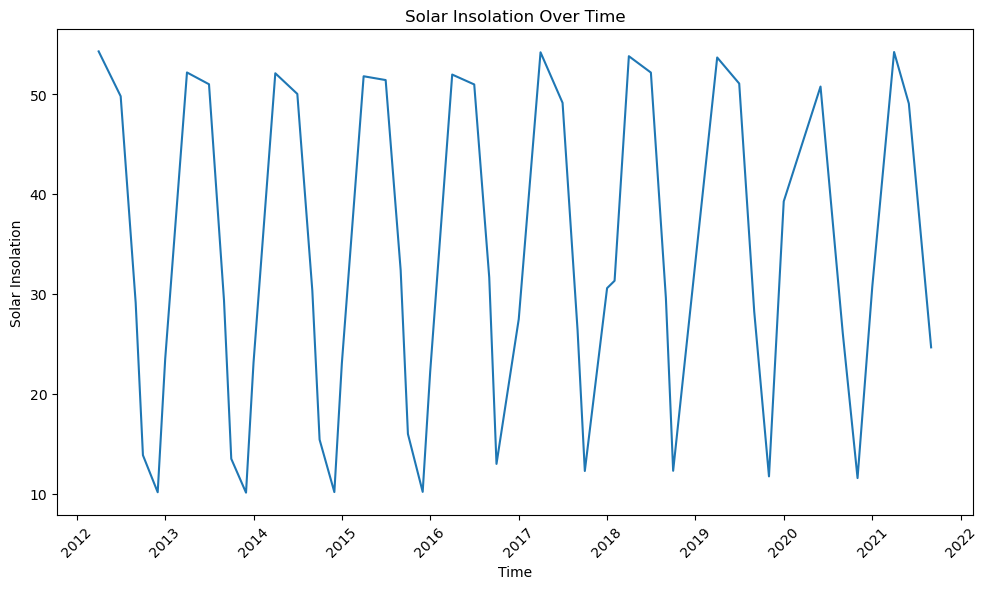

In [63]:
# Plot solar insolation over time
# Solar insolation the amount of solar radiation that reaches a specific area over a period of time

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Solar Insolation', data=env_data)

plt.title('Solar Insolation Over Time')

plt.xlabel('Time')

plt.ylabel('Solar Insolation')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

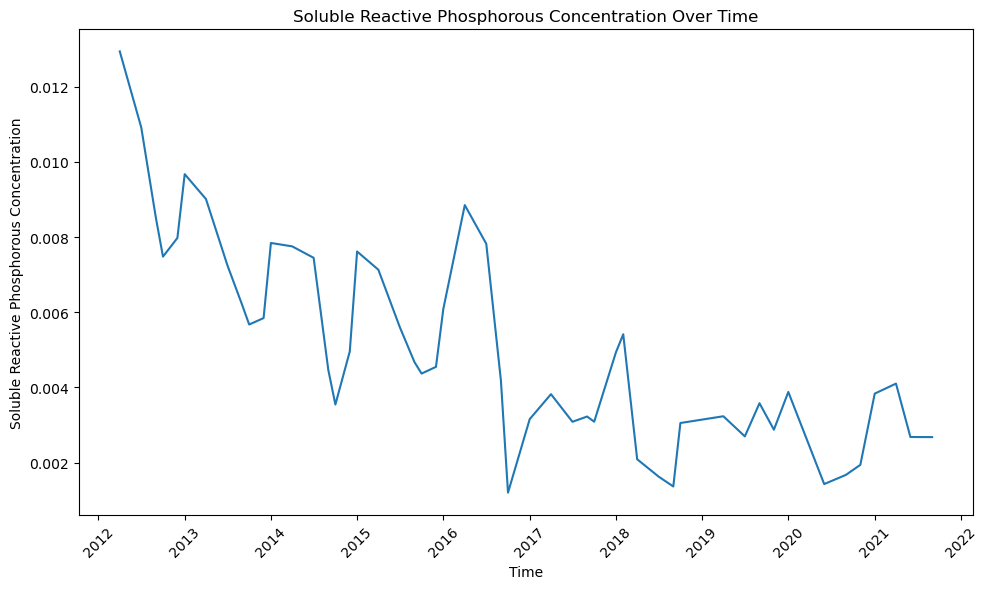

In [64]:
# Plot water temperature over time

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Soluble Reactive Phosphorous Concentration', data=env_data)

plt.title('Soluble Reactive Phosphorous Concentration Over Time')

plt.xlabel('Time')

plt.ylabel('Soluble Reactive Phosphorous Concentration')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

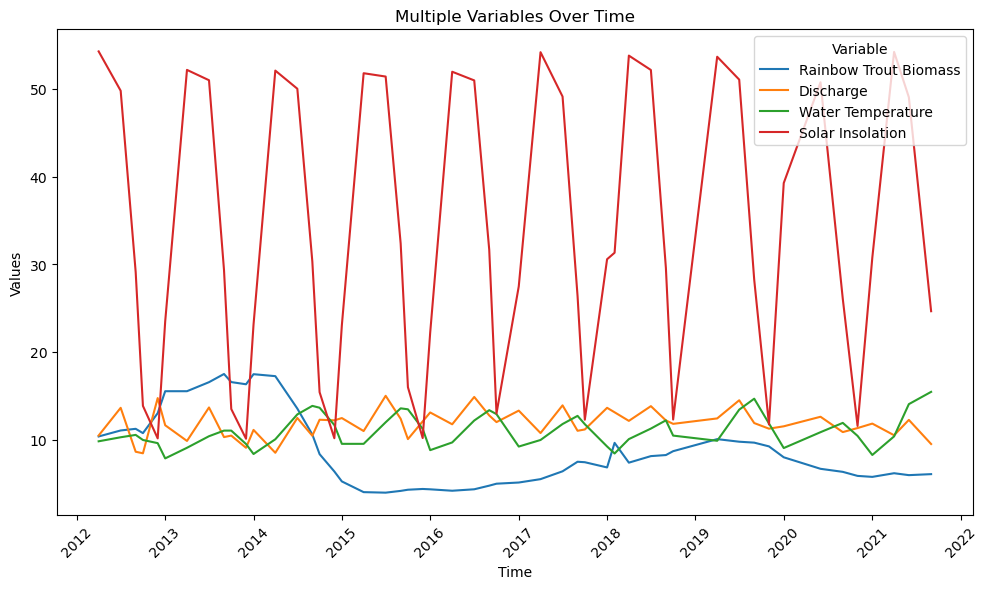

In [65]:
# Reshape the data to long format

melted_data = env_data.melt(id_vars='Trip Start', value_vars=['Rainbow Trout Biomass', 
                                                              'Discharge', 
                                                              'Water Temperature',
                                                              'Solar Insolation'
                                                             ],
                            var_name='Variable', value_name='Value')

# Plot the line plot for variables selected using the long-format data

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Value', hue='Variable', data=melted_data)

plt.title('Multiple Variables Over Time')

plt.xlabel('Time')

plt.ylabel('Values')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

- No obvious correlation between Trout biomass size in relation to "water temperature" and "Discharge"
- Water temperature tend to peak slightly after max solar insolation level in a given year

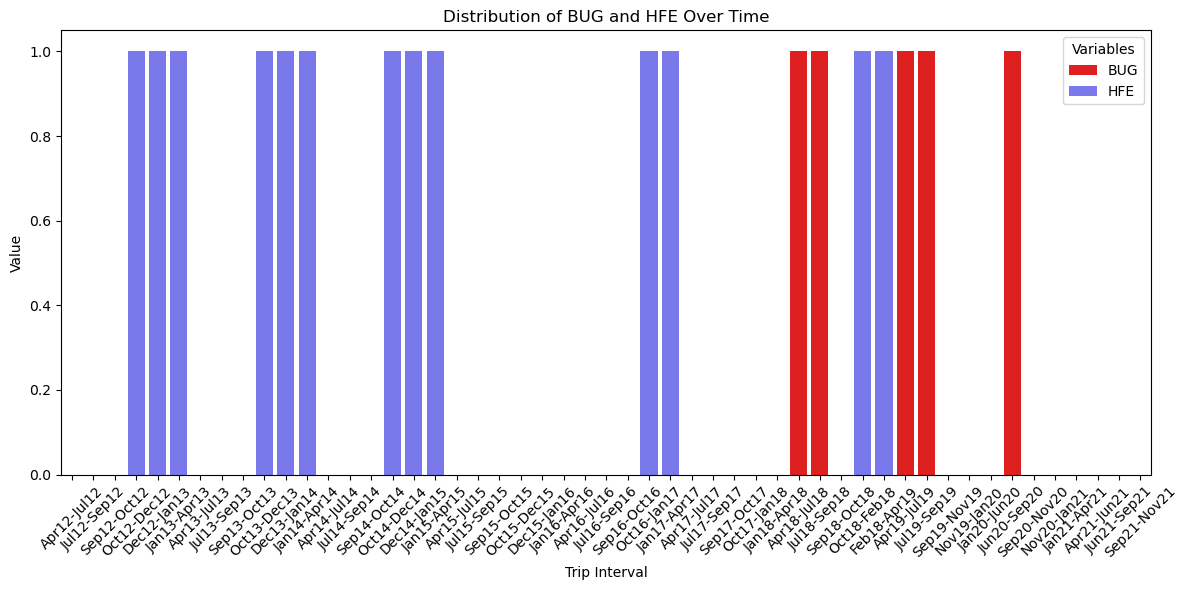

In [67]:
# Figure size

plt.figure(figsize=(12, 6))

# 'BUG' in red

sns.barplot(x='Trip Interval', y='BUG', data=env_data, errorbar=None, color='red', label='BUG')

# 'HFE' in blue

sns.barplot(x='Trip Interval', y='HFE', data=env_data, errorbar=None, color='blue', alpha=0.6, label='HFE')

# Setting up graph details

plt.title('Distribution of BUG and HFE Over Time')

plt.xlabel('Trip Interval')

plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(title='Variables')

plt.tight_layout()

plt.show()

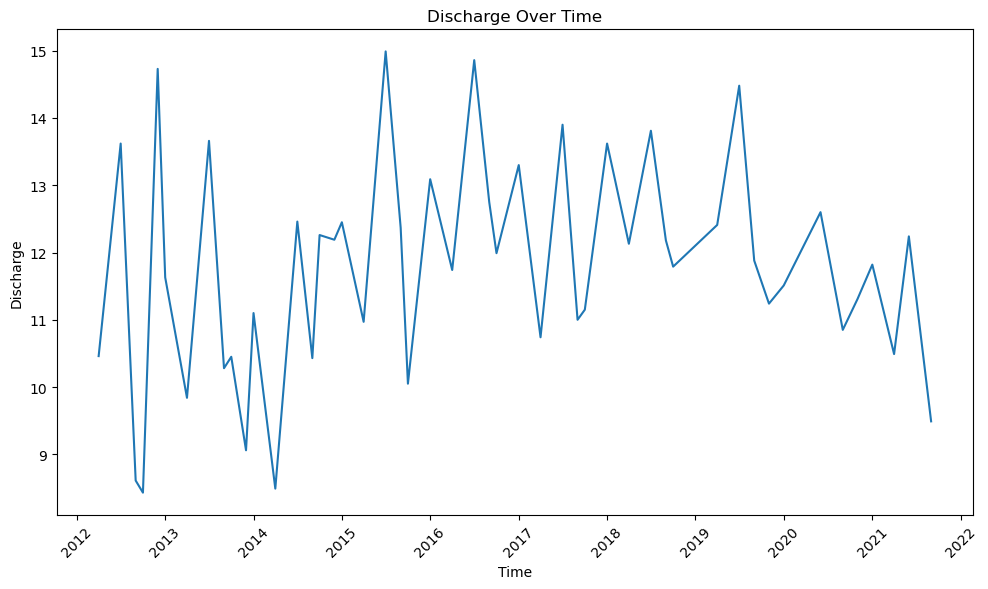

In [68]:
# plot biomass over time

plt.figure(figsize=(10,6))

sns.lineplot(x='Trip Start', y='Discharge', data=env_data)

plt.title('Discharge Over Time')

plt.xlabel('Time')

plt.ylabel('Discharge')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [69]:
# Ensure 'Release Trip' is in datetime format
#parr_data['Release Trip'] = pd.to_datetime(parr_data['Release Trip'])

# Filter the dataframe for release dates after Jan-17-2017

#pd.set_option('display.max_rows', None)  # Display all rows

parr_data_copy = parr_data[parr_data['Time at Large'] <= 77]

In [70]:
# Step 1: Make a copy of the "parr_data" dataset
parr_data_new = parr_data_copy.copy()

# Extract year and month from the 'Release Trip' and 'Recovery Trip' in parr_data_new
parr_data_new['Release_YearMonth'] = parr_data_new['Release Trip'].dt.to_period('M')
parr_data_new['Recovery_YearMonth'] = parr_data_new['Recovery Trip'].dt.to_period('M')

# Extract year and month from the 'Trip Start' and 'Trip End' in env_data
env_data['Trip_Start_YearMonth'] = env_data['Trip Start'].dt.to_period('M')
env_data['Trip_End_YearMonth'] = env_data['Trip End'].dt.to_period('M')


In [71]:
pd.set_option('display.max_rows', None)  # Display all rows

parr_data_new

Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
4      2012-04-19    2012-07-05               -3.73                -3.91   
5      2012-04-19    2012-07-05               -4.15                -4.15   
28     2012-07-05    2012-09-13               -4.31                -5.05   
29     2012-07-05    2012-09-13               -4.06                -4.30   
30     2012-07-05    2012-09-13               -4.31                -4.31   
31     2012-07-05    2012-09-13               -4.30                -4.31   
32     2012-07-05    2012-09-13               -4.15                -4.31   
33     2012-07-05    2012-09-13               -4.02                -4.31   
36     2012-07-05    2012-09-13               -4.15                -4.15   
37     2012-07-05    2012-09-13               -4.15                -4.15   
38     2012-07-05    2012-09-13               -3.75                -3.88   
39     2012-07-05    2012-09-13               -3.62                -3.88   
40     2012-07-05    2012-09-13               -3.49                -3.75   
41     2012-07-05    2012-09-13               -3.62                -3.75   
42     2012-07-05    2012-09-13               -3.62                -3.75   
44     2012-07-05    2012-09-13               -4.30                -4.02   
45     2012-07-05    2012-09-13               -4.06                -4.15   
47     2012-07-05    2012-09-13               -3.62                -3.62   
48     2012-07-05    2012-09-13               -3.75                -3.75   
49     2012-07-05    2012-09-13               -3.73                -3.55   
183    2012-09-13    2012-10-25               -4.31                -7.93   
184    2012-09-13    2012-10-25               -4.02                -4.90   
185    2012-09-13    2012-10-25               -4.15                -4.02   
186    2012-09-13    2012-10-25               -4.31                -4.31   
226    2012-10-25    2012-12-08               -5.07                -7.19   
227    2012-10-25    2012-12-08               -5.37                -5.68   
228    2012-10-25    2012-12-08               -5.51                -5.65   
229    2012-10-25    2012-12-08               -5.22                -5.22   
230    2012-10-25    2012-12-08               -5.22                -5.22   
231    2012-10-25    2012-12-08               -5.05                -5.05   
232    2012-10-25    2012-12-08               -5.05                -5.05   
233    2012-10-25    2012-12-08               -4.02                -4.15   
234    2012-10-25    2012-12-08               -4.15                -4.15   
235    2012-10-25    2012-12-08               -4.15                -4.15   
236    2012-10-25    2012-12-08               -4.15                -4.15   
237    2012-10-25    2012-12-08               -4.30                -4.30   
238    2012-10-25    2012-12-08               -3.75                -4.30   
239    2012-10-25    2012-12-08               -5.37                -5.37   
240    2012-10-25    2012-12-08               -3.75                -3.75   
241    2012-10-25    2012-12-08               -4.02                -3.88   
242    2012-10-25    2012-12-08               -3.49                -3.62   
243    2012-10-25    2012-12-08               -3.62                -3.62   
244    2012-10-25    2012-12-08               -3.62                -3.62   
245    2012-10-25    2012-12-08               -3.62                -3.62   
246    2012-10-25    2012-12-08               -3.62                -3.62   
248    2012-10-25    2012-12-08               -3.75                -3.62   
249    2012-10-25    2012-12-08               -3.49                -3.49   
250    2012-10-25    2012-12-08               -3.49                -3.49   
251    2012-10-25    2012-12-08               -3.49                -3.49   
252    2012-10-25    2012-12-08               -3.49                -3.49   
253    2012-10-25    2012-12-08               -3.49                -3.49   
254    2012-10-25    2012-12-08               -3.34  

In [72]:
# Perform the merge using both conditions: Release_YearMonth = Trip_Start_YearMonth and Recovery_YearMonth = Trip_End_YearMonth
merged_data = pd.merge(parr_data_new, env_data, 
                       left_on=['Release_YearMonth', 'Recovery_YearMonth'], 
                       right_on=['Trip_Start_YearMonth', 'Trip_End_YearMonth'], 
                       how='left')

#pd.set_option('display.max_columns', None)  # Display all rows
#pd.set_option('display.max_rows', None)  # Display all rows

merged_data

Release Trip Recovery Trip  Release River Mile  Recovery River Mile  \
0      2012-04-19    2012-07-05               -3.73                -3.91   
1      2012-04-19    2012-07-05               -4.15                -4.15   
2      2012-07-05    2012-09-13               -4.31                -5.05   
3      2012-07-05    2012-09-13               -4.06                -4.30   
4      2012-07-05    2012-09-13               -4.31                -4.31   
5      2012-07-05    2012-09-13               -4.30                -4.31   
6      2012-07-05    2012-09-13               -4.15                -4.31   
7      2012-07-05    2012-09-13               -4.02                -4.31   
8      2012-07-05    2012-09-13               -4.15                -4.15   
9      2012-07-05    2012-09-13               -4.15                -4.15   
10     2012-07-05    2012-09-13               -3.75                -3.88   
11     2012-07-05    2012-09-13               -3.62                -3.88   
12     2012-07-05    2012-09-13               -3.49                -3.75   
13     2012-07-05    2012-09-13               -3.62                -3.75   
14     2012-07-05    2012-09-13               -3.62                -3.75   
15     2012-07-05    2012-09-13               -4.30                -4.02   
16     2012-07-05    2012-09-13               -4.06                -4.15   
17     2012-07-05    2012-09-13               -3.62                -3.62   
18     2012-07-05    2012-09-13               -3.75                -3.75   
19     2012-07-05    2012-09-13               -3.73                -3.55   
20     2012-09-13    2012-10-25               -4.31                -7.93   
21     2012-09-13    2012-10-25               -4.02                -4.90   
22     2012-09-13    2012-10-25               -4.15                -4.02   
23     2012-09-13    2012-10-25               -4.31                -4.31   
24     2012-10-25    2012-12-08               -5.07                -7.19   
25     2012-10-25    2012-12-08               -5.37                -5.68   
26     2012-10-25    2012-12-08               -5.51                -5.65   
27     2012-10-25    2012-12-08               -5.22                -5.22   
28     2012-10-25    2012-12-08               -5.22                -5.22   
29     2012-10-25    2012-12-08               -5.05                -5.05   
30     2012-10-25    2012-12-08               -5.05                -5.05   
31     2012-10-25    2012-12-08               -4.02                -4.15   
32     2012-10-25    2012-12-08               -4.15                -4.15   
33     2012-10-25    2012-12-08               -4.15                -4.15   
34     2012-10-25    2012-12-08               -4.15                -4.15   
35     2012-10-25    2012-12-08               -4.30                -4.30   
36     2012-10-25    2012-12-08               -3.75                -4.30   
37     2012-10-25    2012-12-08               -5.37                -5.37   
38     2012-10-25    2012-12-08               -3.75                -3.75   
39     2012-10-25    2012-12-08               -4.02                -3.88   
40     2012-10-25    2012-12-08               -3.49                -3.62   
41     2012-10-25    2012-12-08               -3.62                -3.62   
42     2012-10-25    2012-12-08               -3.62                -3.62   
43     2012-10-25    2012-12-08               -3.62                -3.62   
44     2012-10-25    2012-12-08               -3.62                -3.62   
45     2012-10-25    2012-12-08               -3.75                -3.62   
46     2012-10-25    2012-12-08               -3.49                -3.49   
47     2012-10-25    2012-12-08               -3.49                -3.49   
48     2012-10-25    2012-12-08               -3.49                -3.49   
49     2012-10-25    2012-12-08               -3.49                -3.49   
50     2012-10-25    2012-12-08               -3.49                -3.49   
51     2012-10-25    2012-12-08               -3.34  

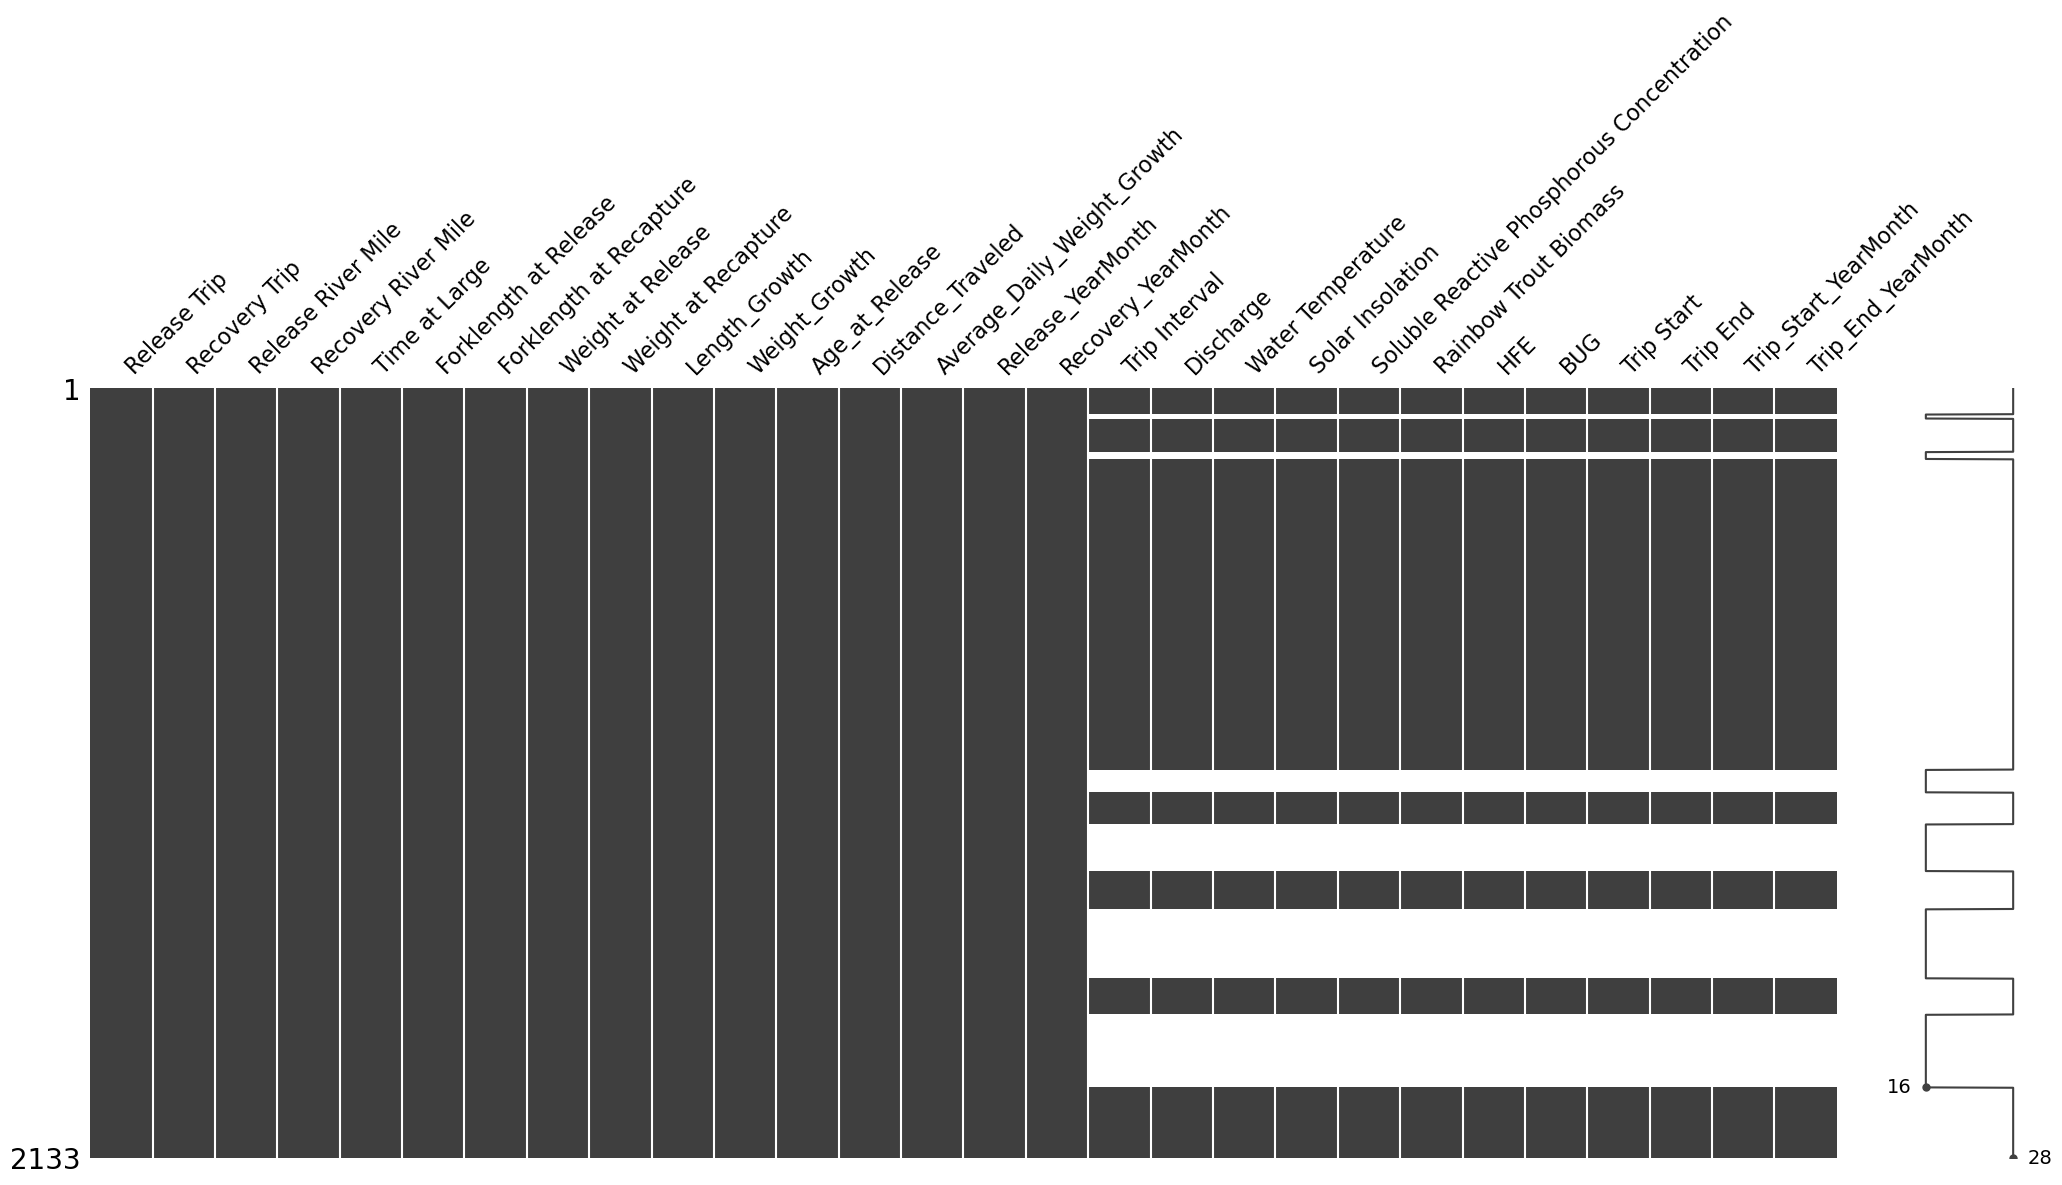

In [73]:
# NA map

msno.matrix(merged_data)

plt.show()

In [74]:
merged_data = merged_data.dropna()

In [75]:
# Create a final data frame

parr_growth_data = merged_data[['Average_Daily_Weight_Growth', 'Discharge', 'Water Temperature', 
             'Solar Insolation', 'Soluble Reactive Phosphorous Concentration',
             'Rainbow Trout Biomass', 'HFE', 'BUG'
            ]]

parr_growth_data

Average_Daily_Weight_Growth  Discharge  Water Temperature  \
0                        0.174026      10.46               9.80   
1                        0.090909      10.46               9.80   
2                        0.271429      13.62              10.26   
3                        0.447143      13.62              10.26   
4                        0.548571      13.62              10.26   
5                        0.368571      13.62              10.26   
6                        0.261429      13.62              10.26   
7                        0.430000      13.62              10.26   
8                        0.157143      13.62              10.26   
9                        0.498571      13.62              10.26   
10                       0.347143      13.62              10.26   
11                       0.180000      13.62              10.26   
12                       0.531429      13.62              10.26   
13                       0.728571      13.62              10.26   
14                       0.417143      13.62              10.26   
15                       0.485714      13.62              10.26   
16                       0.471429      13.62              10.26   
17                       0.700000      13.62              10.26   
18                       0.128571      13.62              10.26   
19                       0.185714      13.62              10.26   
20                       0.040476       8.61              10.53   
21                      -0.085714       8.61              10.53   
22                      -0.252381       8.61              10.53   
23                      -0.011905       8.61              10.53   
24                      -0.004545       8.43               9.95   
25                       0.011364       8.43               9.95   
26                      -0.006818       8.43               9.95   
27                       0.038636       8.43               9.95   
28                      -0.025000       8.43               9.95   
29                       0.061364       8.43               9.95   
30                      -0.050000       8.43               9.95   
31                       0.038636       8.43               9.95   
32                       0.009091       8.43               9.95   
33                       0.011364       8.43               9.95   
34                      -0.009091       8.43               9.95   
35                       0.000000       8.43               9.95   
36                       0.002273       8.43               9.95   
37                      -0.006818       8.43               9.95   
38                       0.040909       8.43               9.95   
39                      -0.002273       8.43               9.95   
40                       0.025000       8.43               9.95   
41                       0.004545       8.43               9.95   
42                       0.022727       8.43               9.95   
43                       0.006818       8.43               9.95   
44                       0.000000       8.43               9.95   
45                       0.002273       8.43               9.95   
46                       0.081818       8.43               9.95   
47                       0.009091       8.43               9.95   
48                       0.000000       8.43               9.95   
49                       0.018182       8.43               9.95   
50                       0.081818       8.43               9.95   
51                       0.052273       8.43               9.95   
52                       0.031818       8.43               9.95   
53                       0.022727       8.43               9.95   
54                       0.006818       8.43               9.95   
55                      -0.052273       8.43               9.95   
56                       0.000000       8.43               9.95   
57                      -0.018182       8.43               9.95   
58                       0.022727       8.43         

In [76]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Define target & features 

X = parr_growth_data.drop(columns=['Average_Daily_Weight_Growth'])  # Features

y = parr_growth_data['Average_Daily_Weight_Growth']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model

model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Train the model

model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)

# Evaluate the model

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse}")

RMSE: 0.33206693678126353


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the neural network model

model = Sequential()

# Input layer and first hidden layer (with 64 neurons)

model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer (with 32 neurons)

model.add(Dense(32, activation='relu'))

# Third hidden layer (with 16 neurons)

model.add(Dense(16, activation='relu'))

# Output layer (for regression, we typically use one neuron with no activation function)

model.add(Dense(1))

# Compile the model with an optimizer, loss function, and evaluation metric

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set

test_loss, test_mae = model.evaluate(X_test, y_test)

# Predict on test set

y_pred = model.predict(X_test)

# Calculate RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'RMSE: {rmse}')

Epoch 1/100


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4976 - mae: 2.8230 - val_loss: 0.8525 - val_mae: 0.8028
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.3987 - mae: 0.5056 - val_loss: 0.1755 - val_mae: 0.2587
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.1718 - mae: 0.2459 - val_loss: 0.1463 - val_mae: 0.2253
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.1102 - mae: 0.2063 - val_loss: 0.1361 - val_mae: 0.2131
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1020 - mae: 0.1913 - val_loss: 0.1268 - val_mae: 0.1918
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.1284 - mae: 0.1848 - val_loss: 0.1237 - val_mae: 0.1860
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0923 - mae: 0.1642 - val_loss: 0.1336 - val_mae: 0.2146
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.1017 - mae: 0.1871 - val_loss: 0.1208 - val_mae: 0.1770
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 